## Investigate Hotel Business using Data Visualization

In [6]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
27555,Resort Hotel,0,0,2018,November,36,2,0,1,2,...,0,No Deposit,NaN,NaN,0,Bussiness,177.00,0,1,Check-Out
1963,Resort Hotel,0,76,2017,November,39,24,2,3,2,...,0,No Deposit,240.0,NaN,0,Personal,76.30,0,1,Check-Out
112976,City Hotel,0,114,2019,July,22,28,2,2,2,...,0,No Deposit,NaN,NaN,0,Personal,95.00,0,0,Check-Out
9169,Resort Hotel,1,192,2018,December,45,31,2,5,2,...,0,No Deposit,196.0,NaN,0,Personal,30.86,0,0,Canceled
92798,City Hotel,0,36,2018,September,28,9,2,1,2,...,0,No Deposit,9.0,NaN,0,Personal,135.90,0,2,Check-Out


## Data Preprocessing

**Checking Columns Type and its detail**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Terdapat 4 column yang memiliki nilai null yaitu: children, city, agent, company

- Column children hanya memiliki 4 rows data null. Kita akan hapus saja 4 rows tersebut 

**Persentase nilai null pada city**

In [5]:
df['city'].isnull().sum()/df.shape[0]*100

0.40874445095904177

Pada column city hanya terdapat nilai null sebesar **0.4%** dari total semua data. Kita bisa hapus rows yang null saja.

**Persentase nilai null pada agent**

In [6]:
df['agent'].isnull().sum()/df.shape[0]*100

13.686238378423655

Column agent memiliki persentase **13%** nilai null. Kita bisa tetap biarkan atau hapus. Namun column ini merepresentasikan ID dari travel agency yang melakukan booking dan terlihat tidak relevant maka bisa kita hapus column nya.

**Persentase nilai null pada company**

In [7]:
df['company'].isnull().sum()/df.shape[0]*100

94.30689337465449

Column company memiliki *94%** nilai null. Lebih baik kita hapus column nya saja.

**Hapus column agent dan company**

In [8]:
df.drop('agent', axis=1, inplace=True)

In [9]:
df.drop('company', axis=1, inplace=True)

In [10]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_weekdays_nights            0
adults                              0
children                            4
babies                              0
meal                                0
city                              488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

**Hapus rows spesifik di column children dan city**

In [11]:
df.dropna(subset=['children', 'city'], inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

Sudah tidak ada nilai null pada data

## EDA (Exploratory Data Analysis) ##

**Bulan atau musim yang memiliki konfirmasi booking paling banyak**

In [13]:
df.groupby(["hotel", "arrival_date_year", "arrival_date_month"], sort=False)["arrival_date_month"].count()

hotel         arrival_date_year  arrival_date_month
Resort Hotel  2017               September             1365
                                 October               1397
                                 November              1555
                                 December              1547
                                 January               1086
                                 February              1246
              2018               March                  851
                                 April                 1486
                                 May                   1742
                                 June                  1843
                                 July                  1790
                                 August                1357
                                 September             1421
                                 October               1676
                                 November              1512
                                 December       

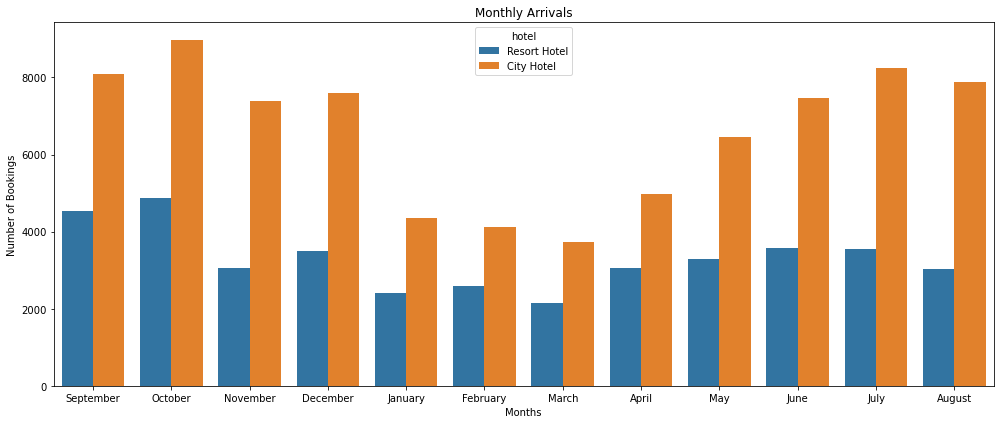

In [14]:
plt.figure(figsize = (14,6))

sns.countplot(x = 'arrival_date_month',
              data = df,
              hue = 'hotel'
             )
plt.title('Monthly Arrivals')
plt.xlabel('Months')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.savefig("monthly_arrival.jpg")

#### Kolom baru yaitu total durasi menginap ####

In [15]:
df['duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,duration
16498,Resort Hotel,0,0,2017,October,35,29,1,1,2,...,0,0,No Deposit,0,Personal,120.60,0,1,Check-Out,2
40671,City Hotel,0,34,2017,October,32,5,0,2,1,...,0,0,No Deposit,0,Family,0.00,0,0,Check-Out,2
40189,City Hotel,1,77,2017,September,29,13,1,2,2,...,0,0,No Deposit,0,Personal,76.50,0,1,Canceled,3
93975,City Hotel,0,150,2018,September,31,24,2,4,2,...,0,0,No Deposit,0,Family,99.45,0,2,Check-Out,6
40511,City Hotel,1,25,2017,September,31,27,1,1,2,...,0,0,No Deposit,0,Family,62.00,0,0,Canceled,2
37732,Resort Hotel,0,253,2019,August,24,15,4,9,2,...,0,3,No Deposit,0,Personal,137.90,0,2,Check-Out,13
87267,City Hotel,0,154,2018,June,16,15,0,2,2,...,0,0,No Deposit,0,Personal,135.00,0,2,Check-Out,2
67917,City Hotel,1,110,2019,July,19,9,0,3,2,...,0,0,No Deposit,0,Personal,85.00,0,0,No-Show,3
112493,City Hotel,0,2,2019,July,21,22,1,2,1,...,0,1,No Deposit,0,Personal,125.00,0,0,Check-Out,3
70900,City Hotel,1,129,2019,August,25,24,2,1,1,...,0,0,Non Refund,0,Personal,120.00,0,0,Canceled,3


In [16]:
df['is_canceled'] = df['is_canceled'].astype('str')

In [17]:
canceled_bookings = df[df['is_canceled'] == '1']

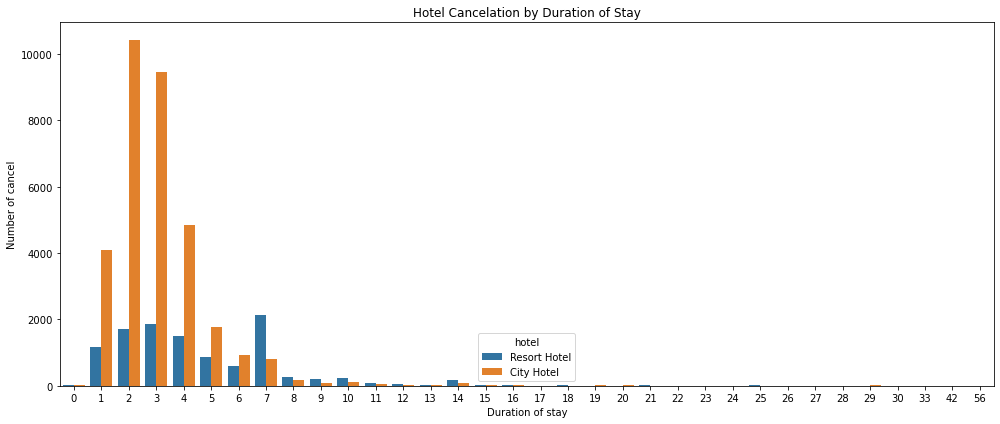

In [18]:
plt.figure(figsize = (14, 6))

sns.countplot(x = 'duration',
              data = canceled_bookings, 
              hue = 'hotel')
plt.title('Hotel Cancelation by Duration of Stay')
plt.xlabel('Duration of stay')
plt.ylabel('Number of cancel')

plt.tight_layout()
plt.savefig("hotel cancelation by duration of stay.jpg")

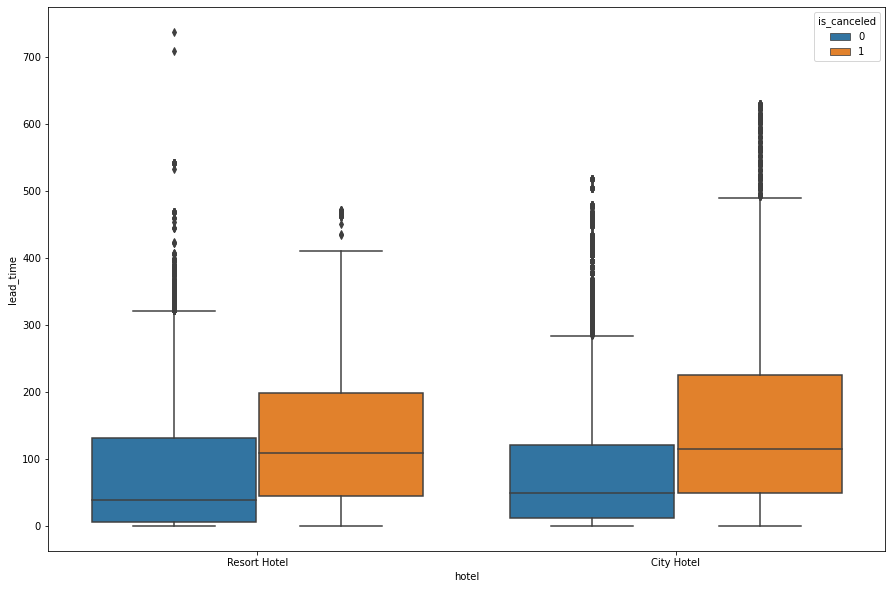

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='hotel', y='lead_time', hue='is_canceled', data=df);

In [20]:
df['lead_time_cat'] = np.where(df['lead_time'] > 300, '> 10 Bulan',
                              np.where(df['lead_time'] > 180, '6-10 bulan',
                                      np.where(df['lead_time'] > 90, '3-6 Bulan', '1-3 Bulan')))
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,duration,lead_time_cat
88078,City Hotel,0,106,2018,June,18,28,0,3,2,...,0,No Deposit,0,Personal,85.70,0,1,Check-Out,3,3-6 Bulan
53233,City Hotel,1,245,2018,August,25,17,0,2,2,...,0,Non Refund,0,Personal,75.00,0,0,Canceled,2,6-10 bulan
52046,City Hotel,0,148,2018,July,23,29,2,2,2,...,0,No Deposit,0,Personal,108.16,0,1,Check-Out,4,3-6 Bulan
22731,Resort Hotel,0,169,2018,May,14,31,1,3,2,...,0,Refundable,0,Family,66.00,0,0,Check-Out,4,3-6 Bulan
2702,Resort Hotel,1,114,2017,December,44,26,7,16,1,...,0,Non Refund,0,Personal,36.00,0,0,Canceled,23,3-6 Bulan


<Figure size 1224x360 with 0 Axes>

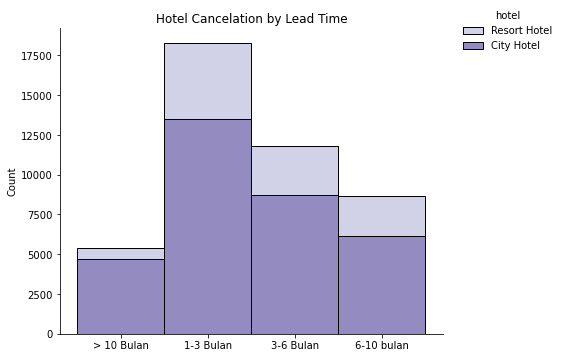

In [41]:
plt.figure(figsize = (17, 5))

ax = sns.displot(data=canceled_bookings, x = df.lead_time_cat, hue = 'hotel', multiple = 'stack', palette = 'Purples', alpha = 0.8).set(xlabel = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Hotel Cancelation by Lead Time')

plt.tight_layout()
plt.savefig("hotel cancelation by lead time.png")